In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
file = '/content/drive/MyDrive/NLP PROJECT/KaggleResumeDataset.csv'

In [26]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
np.random.seed(0) 

# Explanatory Data Analysis

In [27]:
data = pd.read_csv(file)
data.sample(5)

Category  \
590           Python Developer   
278         Health and fitness   
14                Data Science   
678  Network Security Engineer   
338             Java Developer   

                                                Resume  
590  Technical Skills: Languages Python Python Fram...  
278  Education Details \r\nJanuary 2018 M.S. Nutrit...  
14   Education Details \r\n MCA   YMCAUST,  Faridab...  
678  Operating Systems: Windows, Linux, Ubuntu Netw...  
338  Education Details \r\n BE IT   pjlce\r\nJava D...

In [28]:
data.Category.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [29]:
category = data['Category'].value_counts().reset_index()
category

index  Category
0              Java Developer        84
1                     Testing        70
2             DevOps Engineer        55
3            Python Developer        48
4               Web Designing        45
5                          HR        44
6                      Hadoop        42
7                  Blockchain        40
8               ETL Developer        40
9          Operations Manager        40
10               Data Science        40
11                      Sales        40
12        Mechanical Engineer        40
13                       Arts        36
14                   Database        33
15     Electrical Engineering        30
16         Health and fitness        30
17                        PMO        30
18           Business Analyst        28
19           DotNet Developer        28
20         Automation Testing        26
21  Network Security Engineer        25
22              SAP Developer        24
23             Civil Engineer        24
24                   Advocate        20

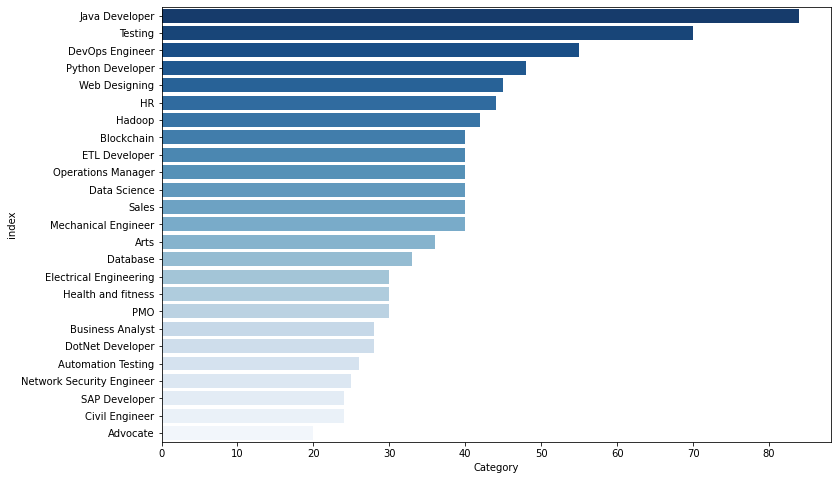

In [30]:
plt.figure(figsize=(12,8))
sns.barplot(x=category['Category'], y=category['index'], palette='Blues_r')
plt.show()

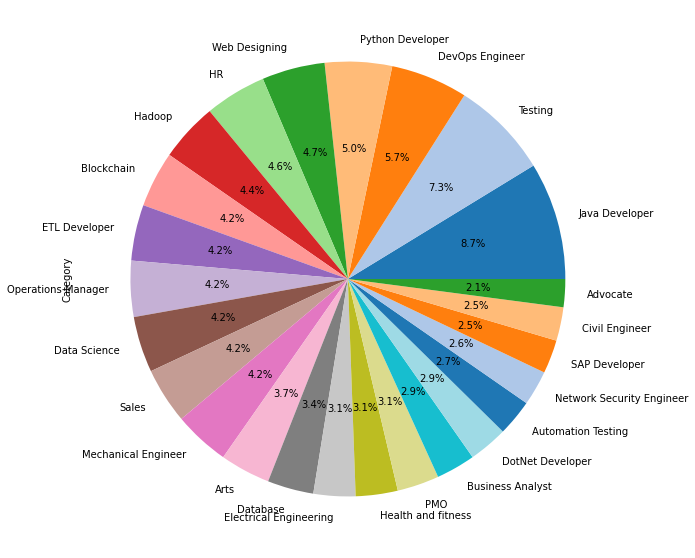

In [31]:
data['Category'].value_counts().plot.pie(figsize = (20,10), colors=sns.color_palette('tab20'), autopct ='%1.1f%%')

# **NLTK**

In [32]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!


True

# **Data PreProcessing**

In [33]:
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import nltk.stem
from nltk.stem import LancasterStemmer, SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
from string import punctuation

In [34]:
'''Checks for punctuations and stopwords, converts to lower case, performs tokenization, POS tagging and lemmatization and 
also removes irrelevant data''' 

def transformed_data(text): 
    stop_words = stopwords.words('english')
    stemmer = SnowballStemmer('english')
    tokens = word_tokenize(text)
    cleaned_tokens = []

    for tok, tag in pos_tag(tokens):
        tok = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\)]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', tok)
        tok = re.sub("(@[A-Za-z0-9_]+)","", tok)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        tok = WordNetLemmatizer().lemmatize(tok, pos)

        if len(tok) > 0 and tok not in punctuation and tok.lower() not in stop_words:
            cleaned_tokens.append(tok.lower())
    return cleaned_tokens

In [35]:


'''Checks for punctuations and stopwords, converts to lower case, performs tokenization, POS tagging and lemmatization and 
also removes irrelevant data''' 

def clean_data(text): 
    stop_words = stopwords.words('english')
    stemmer = SnowballStemmer('english')
    tokens = word_tokenize(text)
    cleaned_tokens = []

    for tok, tag in pos_tag(tokens):
      tok = re.sub('http\S+\s*', ' ', tok)  # remove URLs
      tok = re.sub('RT|cc', ' ', tok)  # remove RT and cc
      tok = re.sub('#\S+', '', tok)  # remove hashtags
      tok = re.sub('@\S+', ' ', tok)  # remove mentions
      tok = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', tok)  # remove punctuations
      tok = re.sub(r'[^\x00-\x7f]',r' ', tok) 
      tok = re.sub('\s+', ' ', tok)  # remove extra whitespace

      if tag.startswith("NN"):
          pos = 'n'
      elif tag.startswith('VB'):
          pos = 'v'
      else:
          pos = 'a'

      lemmatizer = WordNetLemmatizer()
      tok = WordNetLemmatizer().lemmatize(tok, pos)

      if len(tok) > 0 and tok not in punctuation and tok.lower() not in stop_words:
          cleaned_tokens.append(tok.lower())

    return ' '.join(cleaned_tokens)

In [36]:
data['Clean_data'] = data['Resume'].apply(lambda x:clean_data(x))
data.sample(10)

Category                                             Resume  \
289  Health and fitness  Education Details \r\nJanuary 1992 to January ...   
326      Java Developer  TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja...   
653     DevOps Engineer  CORE COMPETENCIES ~ Ant ~ Maven ~ GIT ~ Bitbuc...   
807       ETL Developer  SKILL SET â Talend Big Data â Informatica ...   
127                Arts  I Other Skills Course/Skill Name Board Year Of...   
145       Web Designing  Technical Skills Web Technologies: Angular JS,...   
748              Hadoop  Technical Skill Set Big Data Ecosystems: Hadoo...   
871          Blockchain  SKILLS Bitcoin, Ethereum Solidity Hyperledger,...   
440       SAP Developer  Education Details \r\nMay 2013 Master Computer...   
163       Web Designing  Education Details \r\nJanuary 2016 B.Sc. Infor...   

                                            Clean_data  
289  education details january 1992 january 2003 fi...  
326  technicalskills springmvc   hibernate   jdbc  ...  
653  core competencies   ant   maven   git   bitbuc...  
807  skill set   talend big data   informatica powe...  
127  skills course skill name board year passing gr...  
145  technical skills web technologies   angular js...  
748  technical skill set big data ecosystems   hado...  
871  skills bitcoin   ethereum solidity hyperledger...  
440  education details may 2013 master computer app...  
163  education details january 2016 b sc   informat...

In [37]:
# Creates dictionary of category with all skills in that category
all_skills_data = {}
for i in data.Category.unique():
  list_col = list( data.Resume[data['Category'] == i] ) 
  all_skills_data[str(i)] = [set(transformed_data(j)) for j in list_col]

# **WordClouds**

In [38]:
from wordcloud import WordCloud, STOPWORDS

In [39]:
'''Plots wordcloud for any list of data'''

def Word_Cloud(df, cloud_title):
    comment_words = ""
    stopwords = set(STOPWORDS)
    for val in df:
        comment_words += " ".join(val)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='black',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    plt.figure(figsize = (4,4), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(cloud_title)
    plt.show()

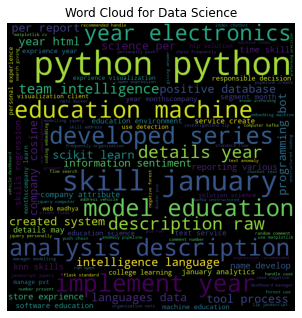

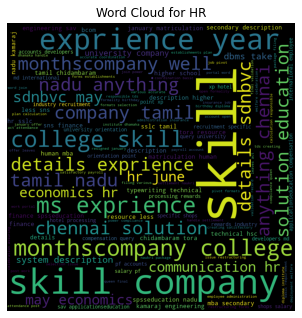

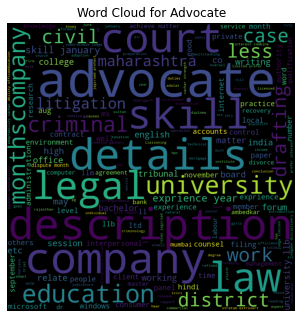

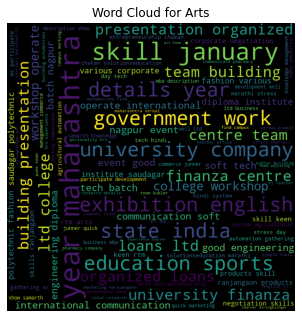

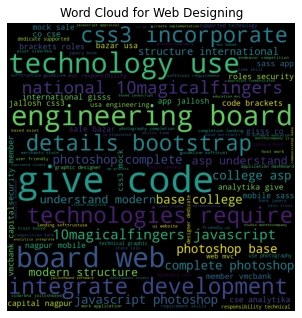

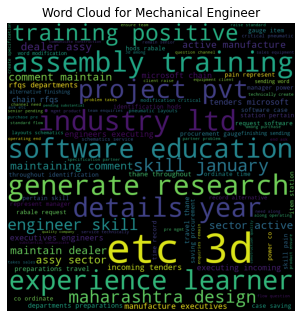

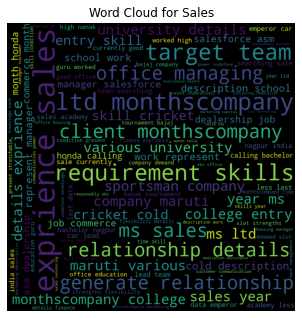

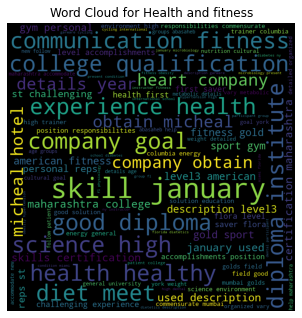

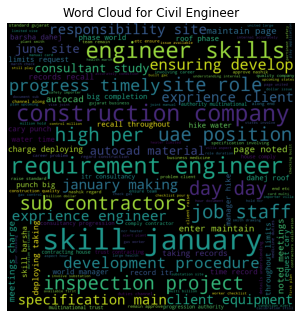

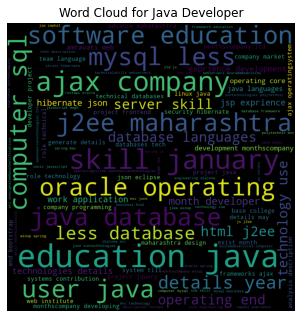

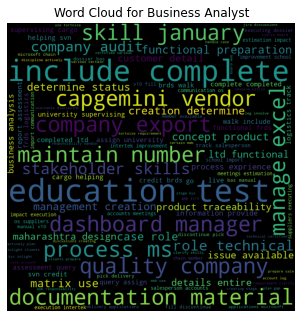

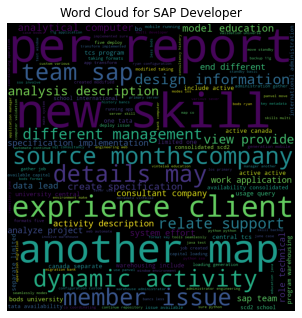

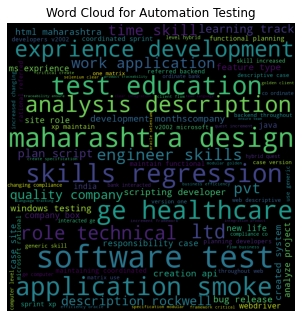

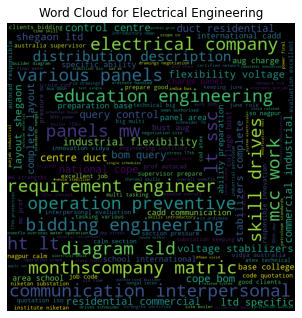

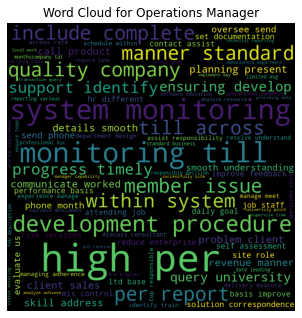

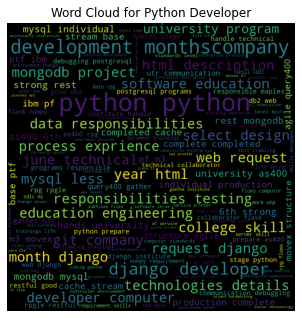

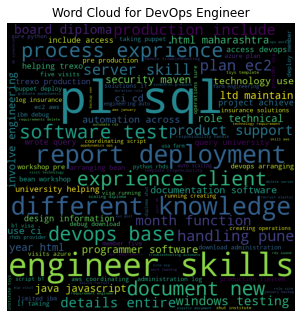

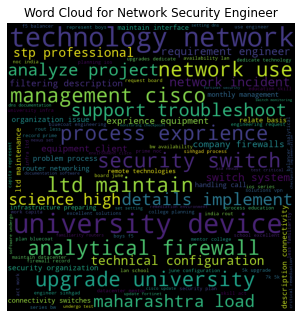

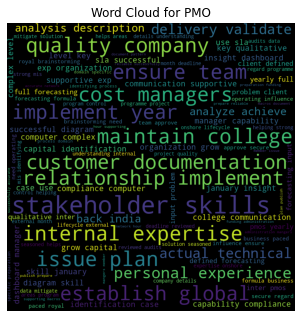

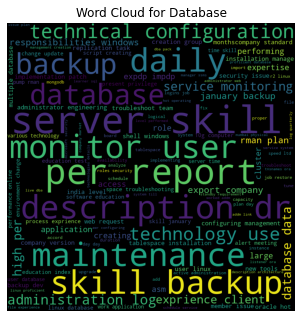

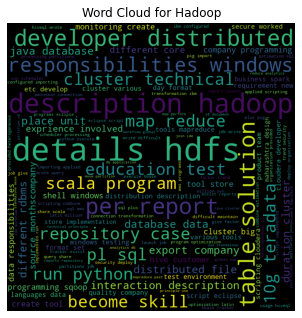

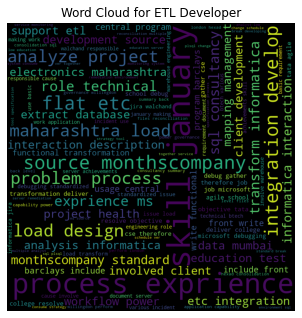

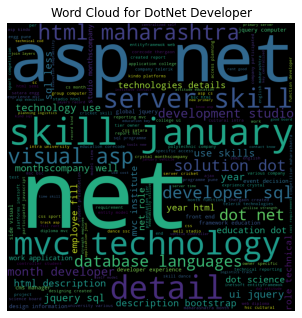

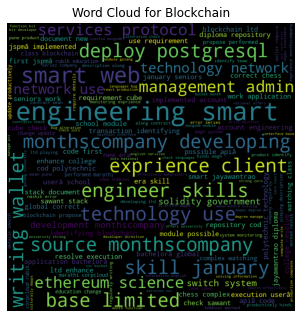

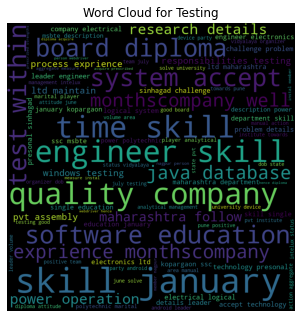

In [40]:
for v,k in all_skills_data.items():
  Word_Cloud(k, f"Word Cloud for {v}")

# **Count Vectorizer**

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
vector = cv.fit_transform(data.Clean_data)
print(type(vector))
X = vector.toarray()
print(X)
Y = data['Category']

<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [42]:
# pickling the model
import pickle

filename = 'CountVector.sav'
pickle.dump(cv, open(filename, 'wb'))

cv = pickle.load(open(filename, 'rb'))

# **TF - IDF Vectorizer**

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(data.Clean_data)
print(type(vector))
X = vector.toarray()
print(X)
Y = data['Category']

<class 'scipy.sparse.csr.csr_matrix'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [44]:
# pickling the model
import pickle

filename = 'Tf-Idf.sav'
pickle.dump(tfidf, open(filename, 'wb'))

tfidf = pickle.load(open(filename, 'rb'))

# **Classification Models**

In [45]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10, stratify = data['Category'])
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(769, 7006) (193, 7006) (769,) (193,)


## Naive Bayes Classifier

In [47]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()
naive.fit(X_train,Y_train)
pred_naive = naive.predict(X_test)

print(f'Accuracy : {accuracy_score(Y_test, pred_naive)}')

Accuracy : 0.9481865284974094


## K-Nearest Neighbour

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
pred_knn = knn.predict(X_test)

print(f'Accuracy : {accuracy_score(Y_test, pred_knn)}')

Accuracy : 0.9689119170984456


## Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
pred_log = log_reg.predict(X_test)

print(f'Accuracy : {accuracy_score(Y_test, pred_log)}')

Accuracy : 0.9740932642487047


## Support Vector Classifier

In [50]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,Y_train)
pred_svm = svm.predict(X_test)

print(f'Accuracy : {accuracy_score(Y_test, pred_svm)}')

Accuracy : 0.9740932642487047


## Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
pred_dtc = dtc.predict(X_test)

print(f'Accuracy : {accuracy_score(Y_test, pred_dtc)}')

Accuracy : 0.9844559585492227


## Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
pred_rfc = rfc.predict(X_test)

print(f'Accuracy : {accuracy_score(Y_test, pred_rfc)}')

Accuracy : 0.9740932642487047


## Gradient Boosting Classifier

In [53]:
'''from sklearn.ensemble import GradientBoostingClassifier 
gbc = GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
pred_gbc = gbc.predict(X_test)

print(f'Accuracy : {accuracy_score(Y_test, pred_gbc)}')'''

"from sklearn.ensemble import GradientBoostingClassifier \ngbc = GradientBoostingClassifier()\ngbc.fit(X_train,Y_train)\npred_gbc = gbc.predict(X_test)\n\nprint(f'Accuracy : {accuracy_score(Y_test, pred_gbc)}')"

## XGBoost Classifier

In [54]:
'''from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)
pred_xgb = xgb.predict(X_test)

print(f'Accuracy : {accuracy_score(Y_test, pred_xgb)}')'''

"from xgboost import XGBClassifier\nxgb = XGBClassifier()\nxgb.fit(X_train,Y_train)\npred_xgb = xgb.predict(X_test)\n\nprint(f'Accuracy : {accuracy_score(Y_test, pred_xgb)}')"

# **Metrics**

In [55]:
from sklearn.metrics import confusion_matrix,classification_report

In [56]:
model_pred = {'Naive Bayes' : pred_naive, 'KNN' : pred_knn, 'Logistic Regression' : pred_log, 'SVM' : pred_svm, 'Decision Tree Classifier' : pred_dtc, 'Random Forest Classifier' : pred_rfc}

## Confusion Matrix

In [57]:
for v,k in model_pred.items():
    print(f'{v} :\n{confusion_matrix(Y_test, model_pred[v])}')
    print("\n-----------------------------------------\n")

Naive Bayes :
[[ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0
   0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1
   0]
 [ 0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  2  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 

## Classfication Report

In [58]:
for v,k in model_pred.items():
    print(f'{v} :\n{classification_report(Y_test, model_pred[v])}')
    print("\n------------------------------------------------------------------------------\n")

Naive Bayes :
                           precision    recall  f1-score   support

                 Advocate       1.00      0.50      0.67         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       1.00      0.80      0.89         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         5
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      0.57      0.73         7
          DevOps Engineer       1.00      0.82      0.90        11
         DotNet Developer       1.00      0.67      0.80         6
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00         9
                   Hadoop       1.00      1.00 

# **Comparison**

In [59]:
accuracy = [[accuracy_score(Y_test, pred_naive), f1_score(Y_test, pred_naive, pos_label="pos", average='weighted')], 
            [accuracy_score(Y_test, pred_knn), f1_score(Y_test, pred_knn, pos_label="pos", average='weighted')], 
            [accuracy_score(Y_test, pred_log), f1_score(Y_test, pred_log, pos_label="pos", average='weighted')], 
            [accuracy_score(Y_test, pred_svm), f1_score(Y_test, pred_svm, pos_label="pos", average='weighted')], 
            [accuracy_score(Y_test, pred_dtc), f1_score(Y_test, pred_dtc, pos_label="pos", average='weighted')], 
            [accuracy_score(Y_test, pred_rfc), f1_score(Y_test, pred_rfc, pos_label="pos", average='weighted')]]

pd.DataFrame(accuracy, columns = ['Prediction Accuracy', 'F1 Score'],
             index = ['Naive Bayes Classification', 'K-Nearest Neighbour', 'Logistic Regression', 'Support Vector Machine', 'Decision Tree Classifier', 'Random Forest Classifier'])

Prediction Accuracy  F1 Score
Naive Bayes Classification             0.948187  0.947467
K-Nearest Neighbour                    0.968912  0.969456
Logistic Regression                    0.974093  0.973055
Support Vector Machine                 0.974093  0.972992
Decision Tree Classifier               0.984456  0.984130
Random Forest Classifier               0.974093  0.972971

In [60]:
# pickling the model
import pickle

filename = 'Final_model.sav'
pickle.dump(naive, open(filename, 'wb'))

rfc = pickle.load(open(filename, 'rb'))

In [61]:
cv, tfidf, rfc

(CountVectorizer(), TfidfVectorizer(), MultinomialNB())

# **Reading Resume**

In [62]:
!pip install PyPDF2

     |████████████████████████████████| 77 kB 5.1 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61102 sha256=801965d1e364c6bc9bbc8c6b6ba396b3095c81a901c3a69c5d9dd50b91f89b30
  Stored in directory: /root/.cache/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2


In [63]:
import PyPDF2
# creating a pdf file object
file_path = '/content/drive/MyDrive/NLP PROJECT/Resume.pdf'
 
try: 
  with open(file_path, 'rb') as pdf:
    pages = PyPDF2.PdfFileReader(pdf)
    count = pages.numPages
    print(count)
    output = []
    for i in range(count):
      page = pages.getPage(i)
      output.append(page.extractText())
    pdf.close()
    print(output)
except:
  print("None")

2
['IBM Data Science\nCoursera\nMicroso˜ Professional Program Certificate in Data Science \nMicroso˜ \nGoogle Certified Professional Data Engineer \nGoogleAWARDS & CERTIFICATIONS:\nJohn WilliamsData Scientist\n101-900-6543johnwilliams@gmail.com\nCertified data scientist with 8 years of experience in providing data-driven solutions to increase e˚iency\nand accuracy. Achievements include updating data streaming processes for an 18% reduction in redundancy,\nas well as improving the accuracy of predicted prices by 10%. Highly skilled in data visualisation, \nmachine learning and natural processing.\n XYZ Technologies\nWORK EXPERIENCE2014-2019California\nGPA: 8.7\nSenior Data Scientist\nTasks\nŁ Developed end-to-end machine learning prototypes and scaled them to run in production environments. Increased \ne˚iciency by 23%\nŁ Derived actionable insights from massive data sets with minimal support. \nŁ Provided input into the collection of new data sources and the refinement of existing once

# **Predicting Resume**

In [64]:
op = ' '.join(output)
#Preprocessing
unseen = transformed_data(op)
len(unseen)

199

In [65]:
vec = tfidf.transform(unseen)
print(type(vec))
x = vec.toarray()

<class 'scipy.sparse.csr.csr_matrix'>


In [66]:
pred = [[naive.predict(x)[0]], 
        [knn.predict(x)[0]], 
        [log_reg.predict(x)[0]], 
        [svm.predict(x)[0]], 
        [dtc.predict(x)[0]], 
        [rfc.predict(x)[0]]]

pd.DataFrame(pred, columns = ['Prediction'],
             index = ['Naive Bayes Classification', 'K-Nearest Neighbour', 'Logistic Regression', 'Support Vector Machine', 'Decision Tree Classifier', 
                      'Random Forest Classifier'])

Prediction
Naive Bayes Classification  Java Developer
K-Nearest Neighbour                 Hadoop
Logistic Regression                     HR
Support Vector Machine                  HR
Decision Tree Classifier          Database
Random Forest Classifier    Java Developer

# **FUTURE ASPECT**

## **GitHub and LinkedIn**

In [72]:
import joblib
from bs4 import BeautifulSoup 
from urllib.request import urlopen 
import json

from tqdm.auto import tqdm

In [73]:
if 'github.com' in output[0]:
  print(output[0].index('github.com')+11)


In [74]:
output[0][150:180]

'DS & CERTIFICATIONS:\nJohn Will'

In [75]:
url = 'https://github.com/Bharati2301/Bharati2301'
html = urlopen(url).read()
soup = BeautifulSoup(html, "html.parser") 

In [76]:
'''for idx, x in enumerate(soup.findAll('article')):
    #print(idx)
    output.append(x.get_text().strip())'''

"for idx, x in enumerate(soup.findAll('article')):\n    #print(idx)\n    output.append(x.get_text().strip())"